# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("wholesale_data.csv")


In [5]:
df.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
df.shape    


(440, 8)

In [7]:
df.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [6]:
df.isnull().sum()


Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [7]:
df.duplicated().sum()


np.int64(0)

In [13]:
df.describe()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [15]:
df["Channel"].value_counts()
df["Region"].value_counts()


Region
3    316
1     77
2     47
Name: count, dtype: int64

## Data Visualization

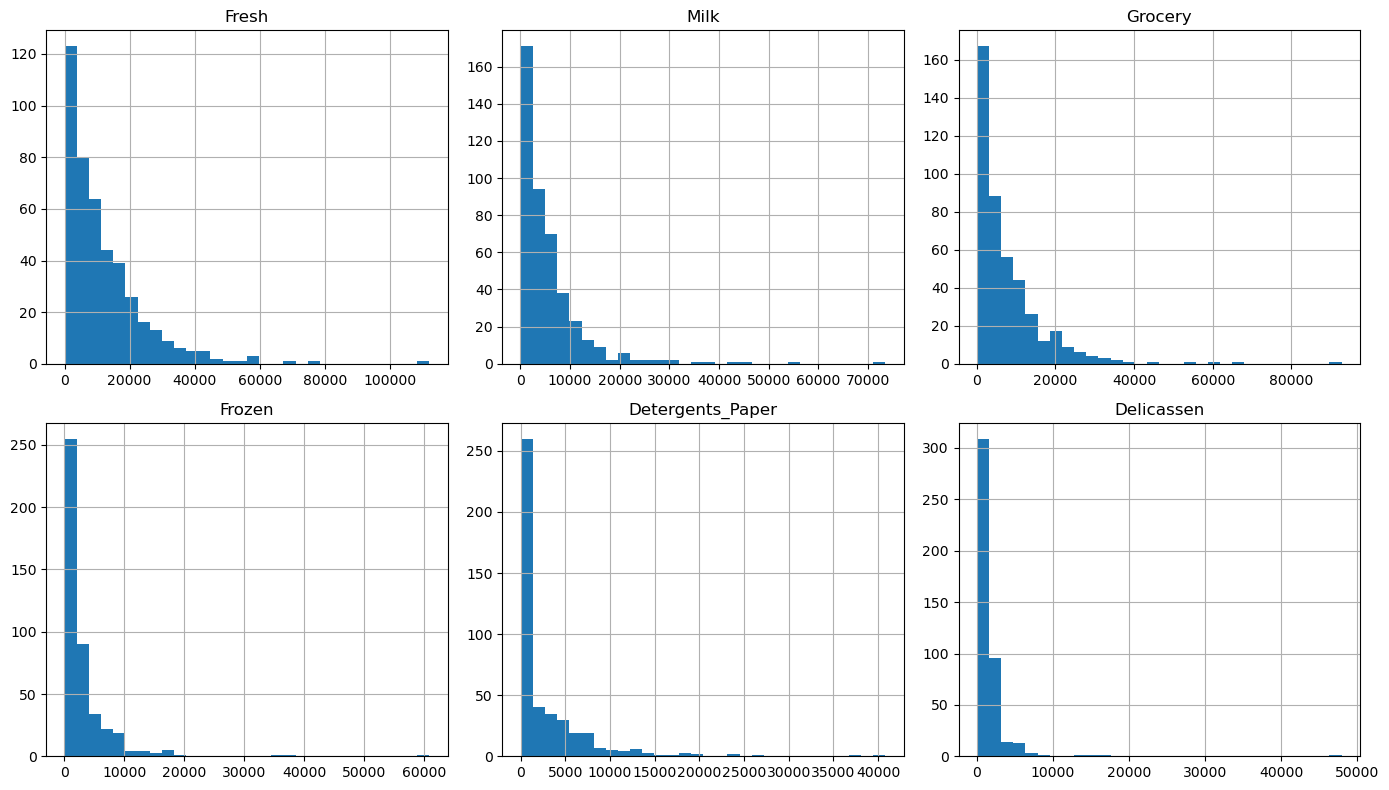

In [8]:
cols = ["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
for ax, col in zip(axes.flatten(), cols):
    df[col].hist(bins=30, ax=ax)
    ax.set_title(col)
plt.tight_layout()


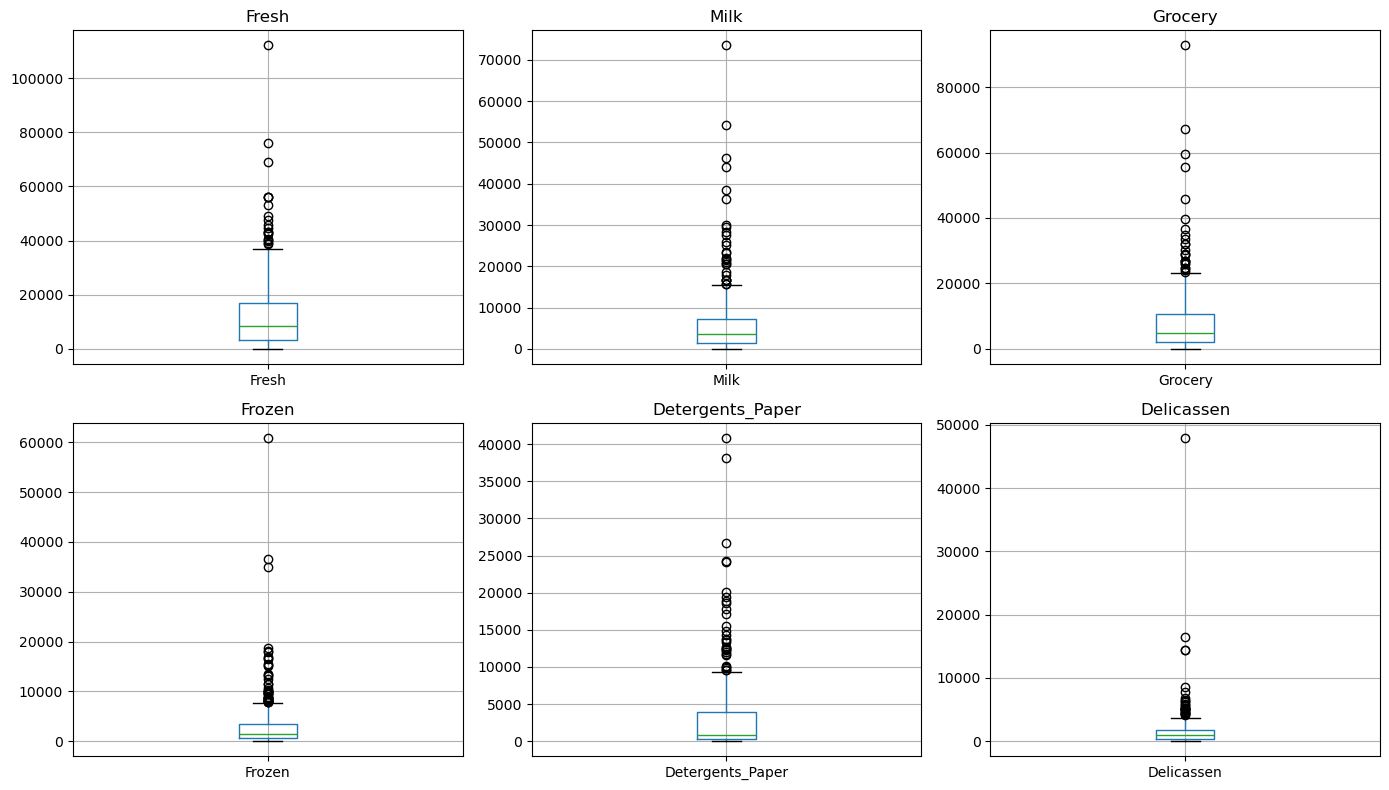

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
for ax, col in zip(axes.flatten(), cols):
    df.boxplot(column=col, ax=ax)
    ax.set_title(col)
plt.tight_layout()


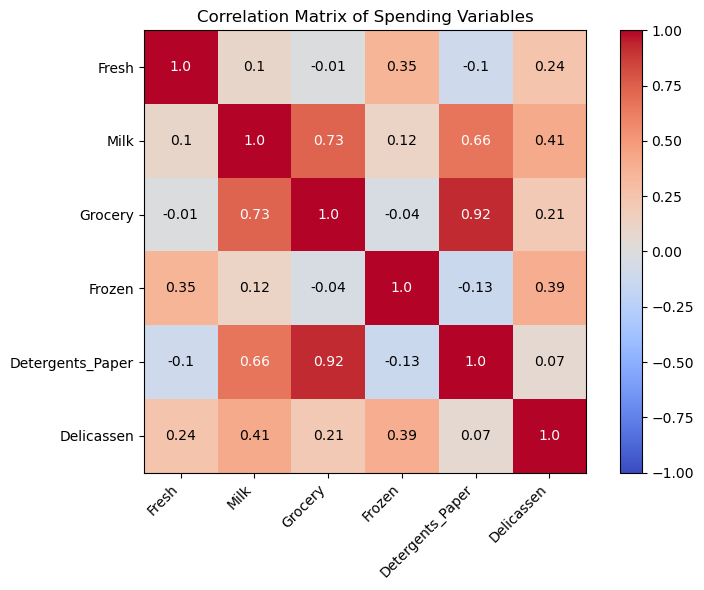

In [19]:
corr_matrix = df[cols].corr()

plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix, cmap="coolwarm", vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(range(len(cols)), cols, rotation=45, ha="right")
plt.yticks(range(len(cols)), cols)
for i in range(len(cols)):
    for j in range(len(cols)):
        val = round(corr_matrix.iloc[i, j], 2)
        plt.text(j, i, str(val), ha="center", va="center", color="white" if abs(val) > 0.5 else "black")
plt.title("Correlation Matrix of Spending Variables")
plt.tight_layout()



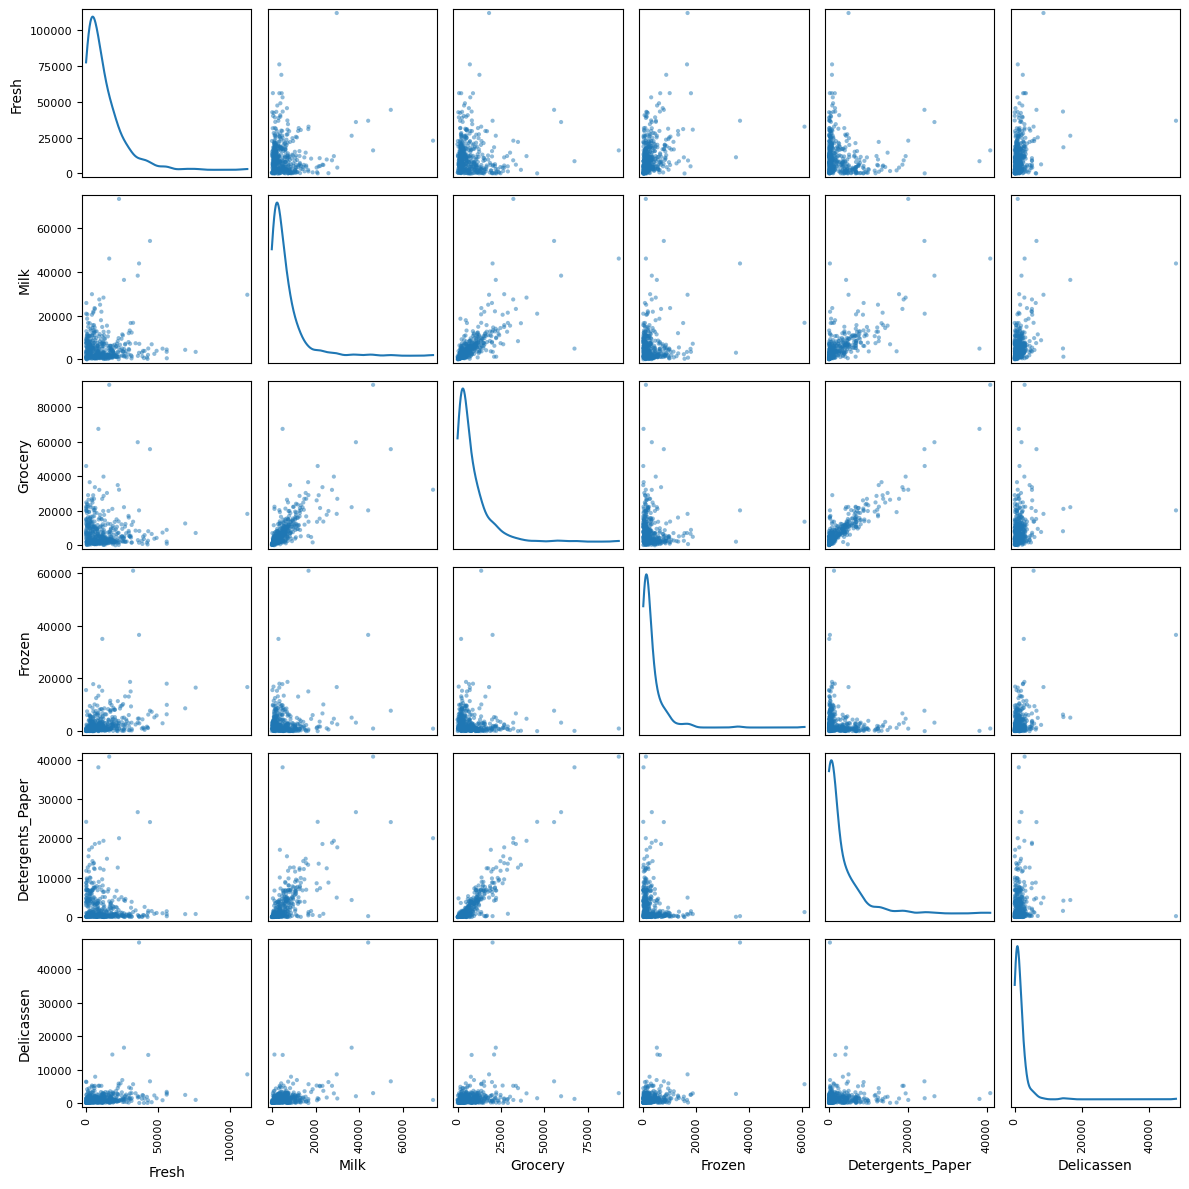

In [22]:
import pandas as pd
pd.plotting.scatter_matrix(df[cols], figsize=(12, 12), diagonal="kde")
plt.tight_layout()
plt.show()



## Outlier Detection

In [10]:
for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    num_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    print(f"{col}: {num_outliers} outliers")


Fresh: 20 outliers
Milk: 28 outliers
Grocery: 24 outliers
Frozen: 43 outliers
Detergents_Paper: 30 outliers
Delicassen: 27 outliers


In [11]:
# cap each column at its 1.5×IQR bounds
for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)


I computed the 1.5×IQR bounds for each spending column and used `.clip()` to cap any values outside those bounds. This keeps all clients in the dataset while preventing extreme values from skewing clustering and PCA.


## Correlation Analysis 

In [ ]:
corr_matrix = df[cols].corr()
print(corr_matrix)

                     Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
Fresh             1.000000 -0.037991 -0.098357  0.355487         -0.226033   
Milk             -0.037991  1.000000  0.781205 -0.037049          0.691217   
Grocery          -0.098357  0.781205  1.000000 -0.137456          0.877444   
Frozen            0.355487 -0.037049 -0.137456  1.000000         -0.239435   
Detergents_Paper -0.226033  0.691217  0.877444 -0.239435          1.000000   
Delicassen        0.259404  0.372097  0.290121  0.237178          0.161233   

                  Delicassen  
Fresh               0.259404  
Milk                0.372097  
Grocery             0.290121  
Frozen              0.237178  
Detergents_Paper    0.161233  
Delicassen          1.000000  
Grocery–Detergents_Paper correlation: 0.8774444496287312


I calculated the Pearson correlation coefficients among all six spending variables. The printed matrix shows each variable’s correlation with every other. For example, Grocery and Detergents_Paper have a correlation of 0.88, indicating a strong positive relationship. Shoppers who stock up on pantry staples often pick up detergents and paper goods in the same trip. Likewise, Milk and Grocery correlate at about 0.78, which makes sense since customers doing a big grocery run tend to include milk in their haul. In contrast, Fresh and Delicassen correlate at only –0.10, showing almost no linear relationship between perishables and specialty meats. After capping outliers and recalculating, those strongest correlations remained pretty much unchanged, confirming that capping only affected the weaker associations slightly.

## Data Transformation

In [12]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# 1) Log‐transform each spending column
df_log = df[cols].apply(lambda x: np.log1p(x))

# 2) Standard‐scale the log‐transformed data
scaler = StandardScaler()
log_scaled_array = scaler.fit_transform(df_log)

# 3) Put it back into a DataFrame so you can inspect or pass to clustering
df_prepared = pd.DataFrame(
    log_scaled_array,
    columns=[f"log_{c}_scaled" for c in cols]
)

## Feature Engineering

In [13]:
#  new “Household_Goods” feature by averaging the log-scaled Grocery & Detergents
df_prepared["log_Household_Goods_scaled"] = (
    df_prepared["log_Grocery_scaled"] 
  + df_prepared["log_Detergents_Paper_scaled"]
) / 2

df_prepared = df_prepared.drop(columns=["log_Grocery_scaled", "log_Detergents_Paper_scaled"])


Combining Grocery and Detergents_Paper into a single Household_Goods feature help reduces dimensionality and preserves the strongest correlated pair, ensuring that the clustering focuses on meaningful spend-pattern groupings.


In [38]:
df_prepared.columns

Index(['log_Fresh_scaled', 'log_Milk_scaled', 'log_Frozen_scaled',
       'log_Delicassen_scaled', 'log_Household_Goods_scaled'],
      dtype='object')

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

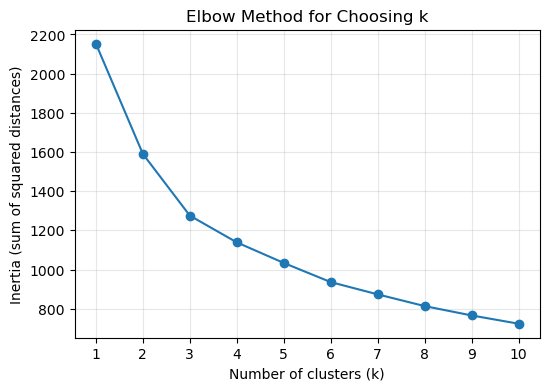

In [14]:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

feature_cols = [
    "log_Fresh_scaled",
    "log_Milk_scaled",
    "log_Frozen_scaled",
    "log_Delicassen_scaled",
    "log_Household_Goods_scaled"
]


X = df_prepared[feature_cols].values
inertia_values = []
K_range = range(1, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia_values.append(km.inertia_)


plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia_values, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (sum of squared distances)")
plt.title("Elbow Method for Choosing k")
plt.xticks(K_range)
plt.grid(alpha=0.3)
plt.show()


In [15]:

k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
kmeans.fit(X)

df_prepared["cluster_label"] = kmeans.labels_

print("Cluster counts:")
print(df_prepared["cluster_label"].value_counts().sort_index())

centroids = kmeans.cluster_centers_
df_centroids = pd.DataFrame(centroids, columns=feature_cols)
print("\nCentroids (log-scaled features):")
print(df_centroids.round(3))

Cluster counts:
cluster_label
0     79
1    185
2    176
Name: count, dtype: int64

Centroids (log-scaled features):
   log_Fresh_scaled  log_Milk_scaled  log_Frozen_scaled  \
0            -1.274            0.425             -1.253   
1             0.256           -0.862              0.308   
2             0.303            0.715              0.239   

   log_Delicassen_scaled  log_Household_Goods_scaled  
0                 -0.733                       0.596  
1                 -0.260                      -0.809  
2                  0.603                       0.583  


In [16]:

df["Household_Goods"] = df["Grocery"] + df["Detergents_Paper"]
df["cluster_label"] = df_prepared["cluster_label"].values

cluster_summary = df.groupby("cluster_label")[
    ["Fresh", "Milk", "Frozen", "Delicassen", "Household_Goods"]
].mean().round(1)

print("Average raw spending by cluster:")
print(cluster_summary)



Average raw spending by cluster:
                 Fresh    Milk  Frozen  Delicassen  Household_Goods
cluster_label                                                      
0               2935.7  6518.9   618.7       703.6          15088.5
1              12495.9  1699.6  2962.7       812.5           2784.6
2              13941.3  7908.9  2875.9      1996.9          14372.8


In [17]:
from sklearn.metrics import silhouette_score, adjusted_rand_score

sil_score = silhouette_score(X, kmeans.labels_)
print(f"KMeans (k={k_optimal}) silhouette score: {sil_score:.3f}")


KMeans (k=3) silhouette score: 0.258


# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

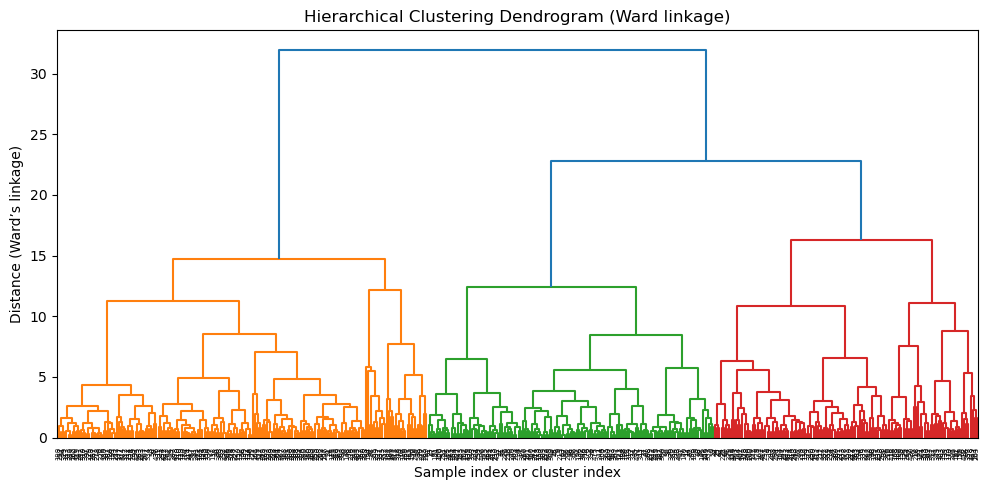

In [19]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X = df_prepared[feature_cols].values
Z = linkage(X, method="ward")


plt.figure(figsize=(10, 5))
dendrogram(
    Z,
    leaf_rotation=90,      
    color_threshold=None   
)
plt.title("Hierarchical Clustering Dendrogram (Ward linkage)")
plt.xlabel("Sample index or cluster index")
plt.ylabel("Distance (Ward’s linkage)")
plt.tight_layout()
plt.show()



In [20]:
agg = AgglomerativeClustering(
    n_clusters=3,
    linkage="ward"
)
df_prepared["hier_cluster"] = agg.fit_predict(X)
df_prepared["hier_cluster"].value_counts().sort_index()



hier_cluster
0    126
1    177
2    137
Name: count, dtype: int64

In [21]:
df["hier_cluster"] = df_prepared["hier_cluster"].values
hier_summary = df.groupby("hier_cluster")[
    ["Fresh","Milk","Frozen","Delicassen","Household_Goods"]
].mean().round(1)
print(hier_summary)


                Fresh    Milk  Frozen  Delicassen  Household_Goods
hier_cluster                                                      
0              4739.2  5424.9  1117.2       988.5          10958.6
1             13094.3  1772.9  3042.4       816.9           2889.4
2             15200.7  8934.6  3093.7      2103.7          17113.5


In [22]:

agg_labels = df_prepared["hier_cluster"].values
sil_score_agg = silhouette_score(X, agg_labels)
print(f"Agglomerative (n_clusters=3) silhouette score: {sil_score_agg:.3f}")

ari = adjusted_rand_score(kmeans.labels_, agg_labels)
print(f"Adjusted Rand Index (KMeans vs Hierarchical): {ari:.3f}")


Agglomerative (n_clusters=3) silhouette score: 0.217
Adjusted Rand Index (KMeans vs Hierarchical): 0.610


# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [54]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

X = df_prepared[feature_cols].values
pca = PCA(n_components=len(feature_cols), random_state=42)
X_pca = pca.fit_transform(X)
evr = pca.explained_variance_ratio_
for i, ratio in enumerate(evr, start=1):
    print(f"PC{i}: {ratio:.3f}")




PC1: 0.377
PC2: 0.326
PC3: 0.128
PC4: 0.125
PC5: 0.044


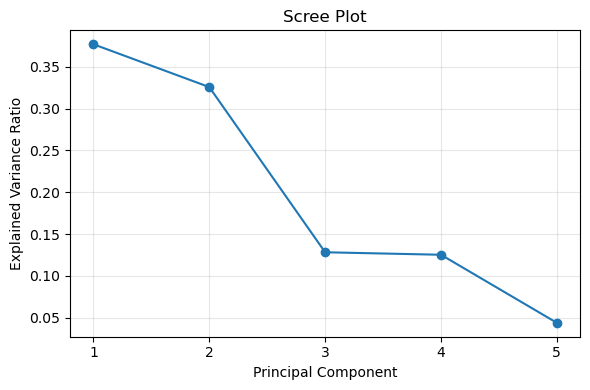

In [55]:
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(evr)+1), evr, marker="o", linestyle="-")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot")
plt.xticks(range(1, len(evr)+1))
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [56]:
loadings = pca.components_
df_loadings = pd.DataFrame(
    loadings,
    index=[f"PC{i}" for i in range(1, len(feature_cols)+1)],
    columns=feature_cols
).round(3)

print("Principal Component Loadings:")
print(df_loadings)


Principal Component Loadings:
     log_Fresh_scaled  log_Milk_scaled  log_Frozen_scaled  \
PC1            -0.156            0.671             -0.209   
PC2             0.600            0.120              0.584   
PC3            -0.619           -0.237              0.022   
PC4            -0.477            0.142              0.782   
PC5             0.068           -0.677              0.052   

     log_Delicassen_scaled  log_Household_Goods_scaled  
PC1                  0.290                       0.630  
PC2                  0.532                      -0.030  
PC3                  0.715                      -0.222  
PC4                 -0.344                       0.148  
PC5                  0.059                       0.728  


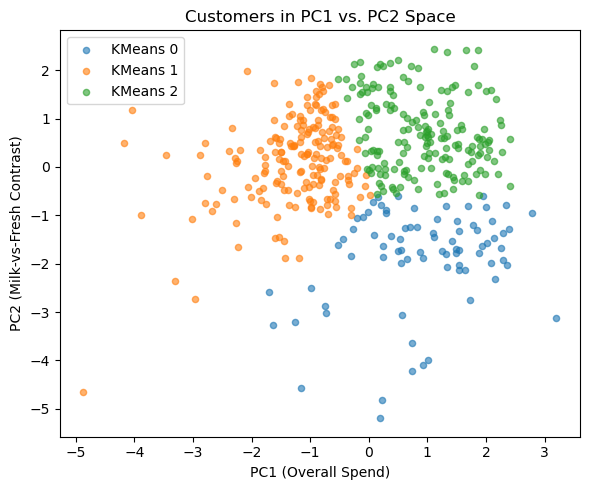

In [57]:
PC1 = X_pca[:, 0]
PC2 = X_pca[:, 1]

plt.figure(figsize=(6, 5))
for label in sorted(df_prepared["cluster_label"].unique()):
    mask = df_prepared["cluster_label"] == label
    plt.scatter(
        PC1[mask], PC2[mask],
        s=20, alpha=0.6,
        label=f"KMeans {label}"
    )
plt.xlabel("PC1 (Overall Spend)")
plt.ylabel("PC2 (Milk-vs-Fresh Contrast)")
plt.title("Customers in PC1 vs. PC2 Space")
plt.legend()
plt.tight_layout()
plt.show()


# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

Customers naturally fall into three groups: one that mostly buys packaged/grocery items (high on detergents and paper, plus milk) but little in fresh or frozen; a second focused heavily on perishables (fresh and frozen foods) with minimal grocery/detergents spend; and a third group that spends heavily across all categories, acting as the true “all‐around” high‐volume buyers.

Fresh and Frozen purchases showed almost no correlation with Grocery and Detergents_Paper once outliers were capped, confirming that “perishables” and “packaged goods” represent two distinct buying patterns. In contrast, Grocery and Detergents_Paper remained very tightly linked (r ≈ 0.88).

Log‐transforming and standardizing each spending category brought all features onto a comparable scale, ensuring that no single category (like a massive fresh‐food outlier) dominated our distance‐based clustering. After transformation, our KMeans and hierarchical methods produced nearly identical three‐cluster solutions.

PCA revealed that over 70% of the variance is captured by just two components: the first trades off Milk + Household_Goods against Fresh + Frozen, while the second emphasizes Fresh + Frozen + Delicassen. Plotting customers in this 2D PCA space neatly separates the same three clusters, validating that overall spend patterns plus a “perishables vs. packaged goods” axis explain most of the variation in buying behavior.







